#Import libraries

In [ ]:
!pip install pyfim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfim: filename=pyfim-6.28-cp310-cp310-linux_x86_64.whl size=637350 sha256=87d9b7de76e8ffb328f9c802c63d5090e64de989274b010c9b86c9da92556f50
  Stored in directory: /root/.cache/pip/wheels/96/0a/b3/c877bfa85c4cfe1baf3de4a89e1949382be09de5eabe49314f
Successfully built pyfim


In [ ]:
from fim import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load Dataset
[Dataset](https://www.datosabiertos.gob.pe/dataset/reclamos-presentados)

In [ ]:
df_reclamos = pd.read_excel("https://www.datosabiertos.gob.pe/sites/default/files/9.1.%20RECLAMOS%20PRESENTADOS_0.xlsx",
                            header=3)
df_reclamos

,Unnamed: 0,Empresa operadora,Mes,Servicio involucrado,Forma de Presentación,N° de Reclamos Presentados
0,NaN,A & P SERVITEL S.A.C.,2016-01-01,Televisión de Paga,Personal,2.0
1,NaN,A & P SERVITEL S.A.C.,2016-02-01,Televisión de Paga,Personal,1.0
2,NaN,A & P SERVITEL S.A.C.,2016-03-01,Televisión de Paga,Personal,3.0
3,NaN,A & P SERVITEL S.A.C.,2016-01-01,Televisión de Paga,Telefónico,1.0
4,NaN,A & P SERVITEL S.A.C.,2016-02-01,Televisión de Paga,Telefónico,2.0
...,...,...,...,...,...,...
13364,NaN,WINNER SYSTEMS S.A.C.,2021-05-01,Internet,Telefónico,19.0
13365,NaN,WINNER SYSTEMS S.A.C.,2021-06-01,Internet,Telefónico,16.0
13366,NaN,WOW TEL S.A.C.,2021-04-01,Internet,Página web,13.0
13367,NaN,WOW TEL S.A.C.,2021-05-01,Internet,Página web,13.0


##Remove columns

In [ ]:
df_reclamos = df_reclamos[['Empresa operadora', 'Servicio involucrado']]
df_reclamos.shape

(13369, 2)

In [ ]:
df_reclamos.head()

,Empresa operadora,Servicio involucrado
0,A & P SERVITEL S.A.C.,Televisión de Paga
1,A & P SERVITEL S.A.C.,Televisión de Paga
2,A & P SERVITEL S.A.C.,Televisión de Paga
3,A & P SERVITEL S.A.C.,Televisión de Paga
4,A & P SERVITEL S.A.C.,Televisión de Paga


In [ ]:
df_reclamos.sample(10)

,Empresa operadora,Servicio involucrado
6691,TELEFÓNICA DEL PERÚ S.A.A.,Servicios móviles
5697,AMERICATEL PERÚ S.A.,Servicio telefónico fijo de larga distancia
2025,ENTEL PERÚ S.A.,Servicios móviles
5644,AMERICA MOVIL PERU S.A.C.,Servicio telefónico fijo local
10895,TELEFÓNICA DEL PERÚ S.A.A.,Internet
5587,VIETTEL PERU S.A.C.,Servicios móviles
1731,TV SAT KABEL S.R.L.,Televisión de Paga
11552,VIP CHANNEL SAC,Televisión de Paga
11829,FRANCISCO HUGO MENA TIPTO,Televisión de Paga
618,AMERICA MOVIL PERU S.A.C.,Televisión de Paga


##Column 'Tipo reclamo'

###Count unique values

In [ ]:
print('Existen {} tipos de servicio'.format(len(df_reclamos['Servicio involucrado'].unique())))
print(df_reclamos['Servicio involucrado'].unique())

Existen 8 tipos de servicio
['Televisión de Paga' 'Servicio telefónico fijo local'
 'Servicio telefónico fijo de larga distancia' 'Servicios móviles'
 'Arrendamiento de circuitos' 'Internet' 'Otros' 'Telefonía pública']


##Column 'Empresa operadora'

###Count unique values



In [ ]:
print('Existen {} empresas operadoras'.format(len(df_reclamos['Empresa operadora'].unique())))
sorted(df_reclamos['Empresa operadora'].unique())

Existen 138 empresas operadoras


['A & P SERVITEL S.A.C.',
 'AIQUE VARGAS, GERMAN',
 'AMAZONIA T.V. S.R.LTDA ',
 'AMERICA MOVIL PERU S.A.C. ',
 'AMERICATEL PERÚ S.A. ',
 'ANDESAT PERU S.A.C.',
 'ANDRES CULQUI CULQUI ',
 'ANURA PERU S.A.C. ',
 'AT & T GLOBAL NETWORK SERVICES DEL PERU S.R.L.',
 'AXESS NETWORKS SOLUTIONS PERU S.A.C. ',
 'AZTECA COMUNICACIONES PERU S.A.C.',
 'Anibal Estrella Cartagena',
 'Asociación de Cable San Jacinto',
 'Axesat Perú S.A.C. ',
 'BANTEL S.A.C. ',
 'BASILES AREVALO FLORES',
 'BEST CABLE PERU S.A.C. ',
 'BT LATAM PERU S.A.C ',
 'CABLE JAEN S.R.L.',
 'CABLE MAX S.A.C ',
 'CABLE NORTE S.A.C.',
 'CABLE ORIENTE S.A',
 'CABLE PACIFICO S.A.C. ',
 'CABLE PLUS S.A.C',
 'CABLE PUCALLPA S.R.L',
 'CABLE SAUCE TV E.I.R.L. ',
 'CABLE SISTEMAS S.R.L. ',
 'CABLE STAR S.A.C.',
 'CABLE SUR TELECOMUNICACIONES S.A.C. ',
 'CABLE VIDEO PERÚ S.A.C.',
 'CABLE VISIÓN LORETO S.A.C.',
 'CABLENORTV S.A.C.',
 'CABLEVISION S.A.C.',
 'CANTARO TV E.I.R.L. ',
 'CATV SYSTEMS E.I.R.L.',
 'CATV. FULL IMAGEN S.A.C.',
 'CECTE

##Remove duplicates

In [ ]:
df_reclamos = df_reclamos.drop_duplicates()

#Transform into transactionnal dataset

In [ ]:
trans = []
for emp in df_reclamos['Empresa operadora'].unique(): #para cada empresa
  #print(emp, df_reclamos[df_reclamos['Empresa operadora'] == emp]['Servicio involucrado'].values)
  trans.append(list(df_reclamos[df_reclamos['Empresa operadora'] == emp]['Servicio involucrado'].values))
print('Hay {} transacciones'.format(len(trans)))

Hay 138 transacciones


In [ ]:
print('La empresa {} tiene reclamos en los servicios {}'.format(df_reclamos['Empresa operadora'].unique()[0], trans[0]))
print('La empresa {} tiene reclamos en los servicios {}'.format(df_reclamos['Empresa operadora'].unique()[20], trans[20]))
print('La empresa {} tiene reclamos en los servicios {}'.format(df_reclamos['Empresa operadora'].unique()[50], trans[50]))
print('La empresa {} tiene reclamos en los servicios {}'.format(df_reclamos['Empresa operadora'].unique()[70], trans[70]))
print('La empresa {} tiene reclamos en los servicios {}'.format(df_reclamos['Empresa operadora'].unique()[100], trans[100]))
print('La empresa {} tiene reclamos en los servicios {}'.format(df_reclamos['Empresa operadora'].unique()[120], trans[120]))

La empresa A & P SERVITEL S.A.C. tiene reclamos en los servicios ['Televisión de Paga']
La empresa CORPORACION T& E S.R.L. tiene reclamos en los servicios ['Televisión de Paga']
La empresa TELEFÓNICA DEL PERÚ S.A.A.  tiene reclamos en los servicios ['Servicio telefónico fijo local', 'Servicio telefónico fijo de larga distancia', 'Servicios móviles', 'Telefonía pública', 'Arrendamiento de circuitos', 'Televisión de Paga', 'Internet', 'Otros']
La empresa CATV. FULL IMAGEN S.A.C. tiene reclamos en los servicios ['Televisión de Paga']
La empresa COMUNICACIONES J&F CABLE TV S.A.C. tiene reclamos en los servicios ['Televisión de Paga', 'Internet']
La empresa CORPORACIÓN HNOS DJAR S.A.C.  tiene reclamos en los servicios ['Televisión de Paga']


#Mining condensed Representations

In [ ]:
#extraer itemsets frecuentes con 1% de soporte mínimo
r = fpgrowth(trans, supp=1)
print(len(r))
r

255


[(('Televisión de Paga',), 95),
 (('Internet', 'Televisión de Paga'), 22),
 (('Internet',), 50),
 (('Servicio telefónico fijo local', 'Televisión de Paga'), 3),
 (('Servicio telefónico fijo local', 'Internet', 'Televisión de Paga'), 3),
 (('Servicio telefónico fijo local', 'Internet'), 13),
 (('Servicio telefónico fijo local',), 15),
 (('Arrendamiento de circuitos', 'Televisión de Paga'), 5),
 (('Arrendamiento de circuitos', 'Internet', 'Televisión de Paga'), 3),
 (('Arrendamiento de circuitos', 'Internet'), 10),
 (('Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Televisión de Paga',
   'Internet'),
  2),
 (('Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Televisión de Paga'),
  2),
 (('Arrendamiento de circuitos', 'Servicio telefónico fijo local', 'Internet'),
  6),
 (('Arrendamiento de circuitos', 'Servicio telefónico fijo local'), 6),
 (('Arrendamiento de circuitos',), 16),
 (('Otros', 'Televisión de Paga'), 3),
 (('Otros', 'Internet', '

In [ ]:
#extraer closed itemsets para el soporte mínimo de 1%
r = fpgrowth(trans, target='c', supp=1)
print(len(r))
r

29


[(('Telefonía pública',
   'Servicios móviles',
   'Televisión de Paga',
   'Servicio telefónico fijo de larga distancia',
   'Otros',
   'Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Internet'),
  2),
 (('Telefonía pública',
   'Servicios móviles',
   'Servicio telefónico fijo de larga distancia',
   'Otros',
   'Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Internet'),
  3),
 (('Telefonía pública',
   'Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Internet'),
  4),
 (('Telefonía pública',
   'Servicio telefónico fijo local',
   'Televisión de Paga',
   'Internet'),
  3),
 (('Telefonía pública', 'Servicio telefónico fijo local', 'Internet'), 5),
 (('Telefonía pública',), 7),
 (('Servicios móviles',
   'Servicio telefónico fijo de larga distancia',
   'Arrendamiento de circuitos',
   'Otros',
   'Servicio telefónico fijo local',
   'Internet'),
  4),
 (('Servicios móviles',
   'Servicio telefónico fijo de larga di

In [ ]:
#extraer los maximal itemsets para un soporte mínimo de 1%
r = fpgrowth(trans, target='m', supp=1)
print(len(r))
r

1


[(('Telefonía pública',
   'Servicios móviles',
   'Televisión de Paga',
   'Servicio telefónico fijo de larga distancia',
   'Otros',
   'Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Internet'),
  2)]

In [ ]:
#extraer los free/generatos itemsets para un soporte mínimo 1%
r = fpgrowth(trans, target='g', supp=1)
print(len(r))
r

47


[(('Televisión de Paga',), 95),
 (('Internet', 'Televisión de Paga'), 22),
 (('Internet',), 50),
 (('Servicio telefónico fijo local', 'Televisión de Paga'), 3),
 (('Servicio telefónico fijo local', 'Internet'), 13),
 (('Servicio telefónico fijo local',), 15),
 (('Arrendamiento de circuitos', 'Televisión de Paga'), 5),
 (('Arrendamiento de circuitos', 'Internet', 'Televisión de Paga'), 3),
 (('Arrendamiento de circuitos', 'Internet'), 10),
 (('Arrendamiento de circuitos',
   'Servicio telefónico fijo local',
   'Televisión de Paga'),
  2),
 (('Arrendamiento de circuitos', 'Servicio telefónico fijo local'), 6),
 (('Arrendamiento de circuitos',), 16),
 (('Otros', 'Televisión de Paga'), 3),
 (('Otros', 'Internet'), 9),
 (('Otros', 'Servicio telefónico fijo local', 'Televisión de Paga'), 2),
 (('Otros', 'Servicio telefónico fijo local'), 7),
 (('Otros', 'Arrendamiento de circuitos', 'Televisión de Paga'), 2),
 (('Otros', 'Arrendamiento de circuitos'), 5),
 (('Otros',), 11),
 (('Servicio tel

In [ ]:
#closed
r_c = fpgrowth(trans, target='c', supp=1)
df_c = pd.DataFrame(r_c)
df_c.columns = ['Itemset', 'Freq']
#free/generator
r_f = fpgrowth(trans, target='g', supp=1)
df_f = pd.DataFrame(r_f)
df_f.columns = ['Itemset', 'Freq']

for c in df_c.values:
  for f in df_f.values:
    if set(f[0]).issubset(set(c[0])) and f[1] == c[1]:
      if len(f[0]) != len(c[0]):
        print(f[0], c[0], c[1])

('Arrendamiento de circuitos', 'Servicio telefónico fijo local', 'Televisión de Paga') ('Telefonía pública', 'Servicios móviles', 'Televisión de Paga', 'Servicio telefónico fijo de larga distancia', 'Otros', 'Arrendamiento de circuitos', 'Servicio telefónico fijo local', 'Internet') 2
('Otros', 'Servicio telefónico fijo local', 'Televisión de Paga') ('Telefonía pública', 'Servicios móviles', 'Televisión de Paga', 'Servicio telefónico fijo de larga distancia', 'Otros', 'Arrendamiento de circuitos', 'Servicio telefónico fijo local', 'Internet') 2
('Otros', 'Arrendamiento de circuitos', 'Televisión de Paga') ('Telefonía pública', 'Servicios móviles', 'Televisión de Paga', 'Servicio telefónico fijo de larga distancia', 'Otros', 'Arrendamiento de circuitos', 'Servicio telefónico fijo local', 'Internet') 2
('Servicio telefónico fijo de larga distancia', 'Internet', 'Televisión de Paga') ('Telefonía pública', 'Servicios móviles', 'Televisión de Paga', 'Servicio telefónico fijo de larga distan

##Support

In [ ]:
#función para obtener el grupo de transacciones/empresas que soportan cada itemset
def support(x, labels, trans):
  s = [] #inicializar el soporte en vacío
  for t in range(len(trans)): #para cada transacción
    if set(x).issubset(set(trans[t])): #si el itemset x está incluido en la transacción t
      s.append(labels[t])
  return s

In [ ]:
pd.set_option('display.max_colwidth', None) #opción para que el dataframe no tenga límite de ancho
labels = list(df_reclamos['Empresa operadora'].unique()) #etiquetas con los nombres de las empresas
df_c['Support'] = [support(x, labels,trans) for x in df_c['Itemset'].values] #crear una columna de support, con los valores de transacciones/empresas que contiene cada itemset
df_c

,Itemset,Freq,Support
0,"(Telefonía pública, Servicios móviles, Televisión de Paga, Servicio telefónico fijo de larga distancia, Otros, Arrendamiento de circuitos, Servicio telefónico fijo local, Internet)",2,"[AMERICA MOVIL PERU S.A.C. , TELEFÓNICA DEL PERÚ S.A.A. ]"
1,"(Telefonía pública, Servicios móviles, Servicio telefónico fijo de larga distancia, Otros, Arrendamiento de circuitos, Servicio telefónico fijo local, Internet)",3,"[AMERICA MOVIL PERU S.A.C. , ENTEL PERÚ S.A., TELEFÓNICA DEL PERÚ S.A.A. ]"
2,"(Telefonía pública, Arrendamiento de circuitos, Servicio telefónico fijo local, Internet)",4,"[AMERICA MOVIL PERU S.A.C. , ENTEL PERÚ S.A., GILAT TO HOME PERÚ S.A. , TELEFÓNICA DEL PERÚ S.A.A. ]"
3,"(Telefonía pública, Servicio telefónico fijo local, Televisión de Paga, Internet)",3,"[AMERICA MOVIL PERU S.A.C. , TELEFÓNICA DEL PERÚ S.A.A. , WINNER SYSTEMS S.A.C. ]"
4,"(Telefonía pública, Servicio telefónico fijo local, Internet)",5,"[AMERICA MOVIL PERU S.A.C. , ENTEL PERÚ S.A., GILAT TO HOME PERÚ S.A. , TELEFÓNICA DEL PERÚ S.A.A. , WINNER SYSTEMS S.A.C. ]"
5,"(Telefonía pública,)",7,"[AMERICA MOVIL PERU S.A.C. , ENTEL PERÚ S.A., GILAT TO HOME PERÚ S.A. , PRISONTEC S.A.C , TELEFÓNICA DEL PERÚ S.A.A. , WINNER SYSTEMS S.A.C. , SERVICIOS GLOBALES DE TELECOMUNICACIONES S.A.C. ]"
6,"(Servicios móviles, Servicio telefónico fijo de larga distancia, Arrendamiento de circuitos, Otros, Servicio telefónico fijo local, Internet)",4,"[AMERICA MOVIL PERU S.A.C. , AMERICATEL PERÚ S.A. , ENTEL PERÚ S.A., TELEFÓNICA DEL PERÚ S.A.A. ]"
7,"(Servicios móviles, Servicio telefónico fijo de larga distancia, Otros, Servicio telefónico fijo local, Internet)",5,"[AMERICA MOVIL PERU S.A.C. , AMERICATEL PERÚ S.A. , CONVERGIA PERÚ S.A., ENTEL PERÚ S.A., TELEFÓNICA DEL PERÚ S.A.A. ]"
8,"(Servicios móviles, Servicio telefónico fijo local, Internet)",6,"[AMERICA MOVIL PERU S.A.C. , AMERICATEL PERÚ S.A. , CONVERGIA PERÚ S.A., ENTEL PERÚ S.A., TELEFÓNICA DEL PERÚ S.A.A. , VIETTEL PERU S.A.C.]"
9,"(Servicios móviles,)",9,"[AMERICA MOVIL PERU S.A.C. , AMERICATEL PERÚ S.A. , CONVERGIA PERÚ S.A., ENTEL PERÚ S.A., TELEFÓNICA DEL PERÚ S.A.A. , VIETTEL PERU S.A.C., INCACEL MOVIL S.A., GUINEA MOBILE S.A.C. , FLASH SERVICIOS PERÚ S.R.L. ]"


In [ ]:
pd.set_option('display.max_colwidth', None) #opción para que el dataframe no tenga límite de ancho
labels = [i for i in range(138)]
df_c['Support'] = [support(x, labels,trans) for x in df_c['Itemset'].values] #crear una columna de support, con los valores de transacciones/empresas que contiene cada itemset
df_c

,Itemset,Freq,Support
0,"(Telefonía pública, Servicios móviles, Televisión de Paga, Servicio telefónico fijo de larga distancia, Otros, Arrendamiento de circuitos, Servicio telefónico fijo local, Internet)",2,"[2, 50]"
1,"(Telefonía pública, Servicios móviles, Servicio telefónico fijo de larga distancia, Otros, Arrendamiento de circuitos, Servicio telefónico fijo local, Internet)",3,"[2, 25, 50]"
2,"(Telefonía pública, Arrendamiento de circuitos, Servicio telefónico fijo local, Internet)",4,"[2, 25, 28, 50]"
3,"(Telefonía pública, Servicio telefónico fijo local, Televisión de Paga, Internet)",3,"[2, 50, 63]"
4,"(Telefonía pública, Servicio telefónico fijo local, Internet)",5,"[2, 25, 28, 50, 63]"
5,"(Telefonía pública,)",7,"[2, 25, 28, 43, 50, 63, 90]"
6,"(Servicios móviles, Servicio telefónico fijo de larga distancia, Arrendamiento de circuitos, Otros, Servicio telefónico fijo local, Internet)",4,"[2, 3, 25, 50]"
7,"(Servicios móviles, Servicio telefónico fijo de larga distancia, Otros, Servicio telefónico fijo local, Internet)",5,"[2, 3, 19, 25, 50]"
8,"(Servicios móviles, Servicio telefónico fijo local, Internet)",6,"[2, 3, 19, 25, 50, 59]"
9,"(Servicios móviles,)",9,"[2, 3, 19, 25, 50, 59, 72, 126, 130]"


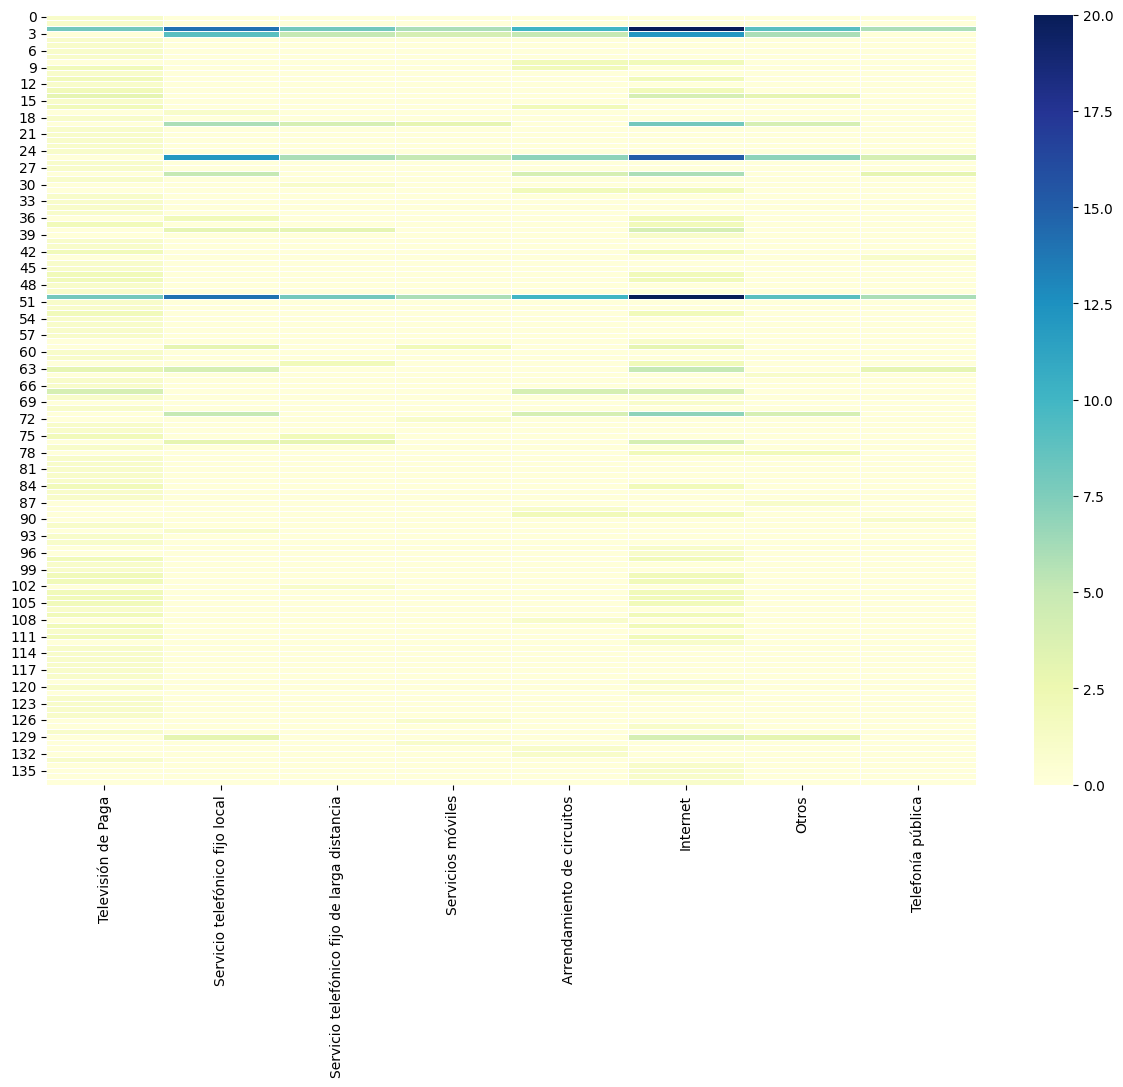

In [ ]:
import seaborn as sns

def plot_itemsets(df_, n_trans, n_items):
  a = np.zeros((n_trans, n_items)) #matriz de 0s de transacciones por items
  #print(a)
  items = list(df_reclamos['Servicio involucrado'].unique()) #lista de items/servicios
  for it in range(df_.shape[0]): #para cada itemset
    x = [items.index(i) for i in df_.iloc[it,0]]
    y = [i for i in df_.iloc[it,2]]
    #print(x)
    #print(y)
    for t in y:
      for i in x:
        a[t,i] = a[t,i] + 1
  fig,ax = plt.subplots(figsize=(15,10))
  sns.heatmap(a, linewidth=.5, ax=ax, vmin=0, cmap='YlGnBu', xticklabels=items)

plot_itemsets(df_c, 138, 8)

##Function to Draw lattice

In [ ]:
from graphviz import *
def to_binary(n, numeroItems):
    x = bin(n).replace("0b","")
    return ("0" * (numeroItems - len(x))) + x

def tratarPatterns(l):
    p = []
    f = []
    for x in l:
        y = list(x[0])
        y.sort()
        p += [str(y)]
        f += [x[1]]
    return p,f

def dibujarLattice(d,numeroItems,minsupp):
    a = fpgrowth(d, target='a', supp=minsupp)
    c = fpgrowth(d, target='c', supp=minsupp)
    m = fpgrowth(d, target='m', supp=minsupp)
    dot = Graph(comment='Lattice')
    dot.attr(size='40,20')
    pa,fa = tratarPatterns(a)
    pc,fc = tratarPatterns(c)
    pm,fm = tratarPatterns(m)
    for i in range(pow(2,numeroItems)):
        b = to_binary(i, numeroItems)
        b1 = [(j+1) for j in range(len(b)) if b[j] == '1']
        if str(b1) in pa or i == 0:
            if str(b1) in pm:#maximal
                dot.node(b, str(b1).replace("'","").replace(" ","") + " " + str(fm[pm.index(str(b1))]), shape='Square', style='filled', color='yellow')
            elif str(b1) in pc:#closed
                dot.node(b, str(b1).replace("'","").replace(" ","") + " " + str(fc[pc.index(str(b1))]), shape='Square', style='filled', color='orange')
            else:
                if len(b1) == 0:
                  dot.node(b, str(b1).replace("'","").replace(" ",""), style='filled')
                else:
                  dot.node(b, str(b1).replace("'","").replace(" ","") + " " + str(fa[pa.index(str(b1))]), shape='Square', style='filled', fillcolor='white')
        else:
            dot.node(b, str(b1).replace("'","").replace(" ",""), shape='Square', style='filled', color='lightgray', fontcolor = 'white')
        for j in range(numeroItems):
            if b[j] == '1':
                b1 = b[:j] + "0" + b[j + 1:]
                dot.edge(b, b1)
    return dot

##Transform items into number
Just for visualization purposes

In [ ]:
items = list(df_reclamos['Servicio involucrado'].unique())
trans2 = []
for t in trans:
  trans2 += [[items.index(i)+1 for i in t]]

print(trans[10], trans2[10])
print(trans[130], trans2[130])

['Televisión de Paga'] [1]
['Servicios móviles'] [4]


##Draw all frequent itemsets that appear at least once


* Yellow for maximal
* Orange for closed
* White for frequent
* Gray for infrequent

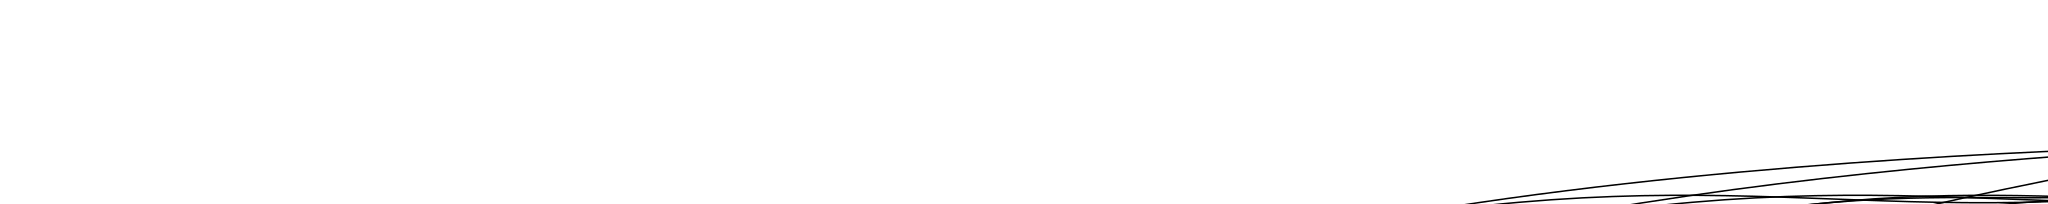

In [ ]:
dibujarLattice(trans2, 8, -3)

##Draw all frequent itemsets that appear at least two times

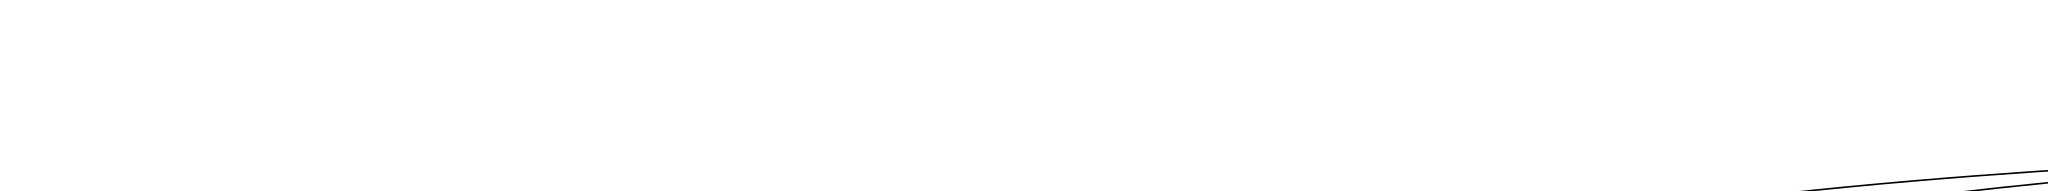

In [ ]:
dibujarLattice(trans2, 8, -2)

##Draw all frequent itemsets that appear at least 10 times

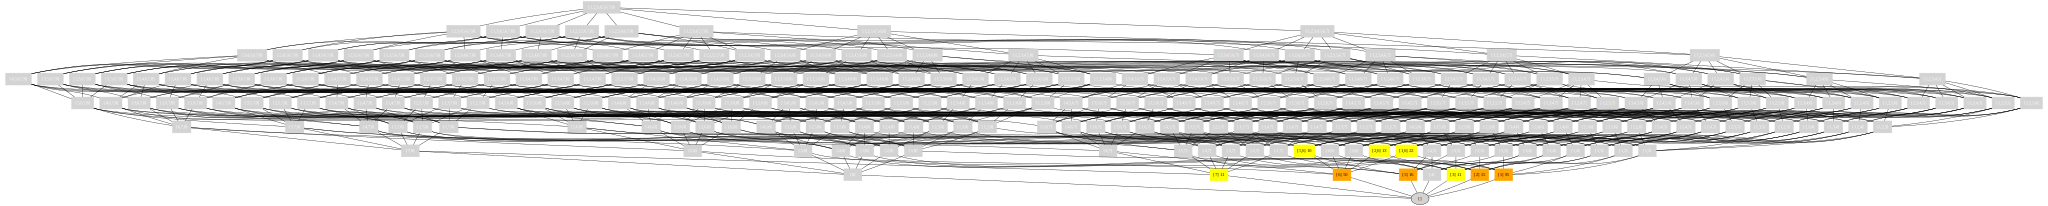

In [ ]:
dibujarLattice(trans2, 8, -10)

[7, 8] [8] 7 3 1 13
[7, 8] [7] 11 3 1 16
[6, 8] [8] 7 5 1 20
[6, 8] [6] 50 5 1 9
[6, 7] [7] 11 9 1 17
[6, 7] [6] 50 9 1 19
[6, 7, 8] [7, 8] 3 3 1 1
[6, 7, 8] [6, 8] 5 3 1 8
[6, 7, 8] [6, 7] 9 3 1 15
[5, 8] [8] 7 4 1 14
[5, 8] [5] 16 4 1 18
[5, 7] [7] 11 5 1 5
[5, 7] [5] 16 5 1 14
[5, 7, 8] [7, 8] 3 3 1 1
[5, 7, 8] [5, 8] 4 3 1 7
[5, 7, 8] [5, 7] 5 3 1 3
[5, 6] [6] 50 10 1 18
[5, 6] [5] 16 10 1 20
[5, 6, 8] [6, 8] 5 4 1 4
[5, 6, 8] [5, 8] 4 4 1 1
[5, 6, 8] [5, 6] 10 4 1 3
[5, 6, 7] [6, 7] 9 5 1 7
[5, 6, 7] [5, 7] 5 5 1 1
[5, 6, 7] [5, 6] 10 5 1 9
[5, 6, 7, 8] [6, 7, 8] 3 3 1 1
[5, 6, 7, 8] [5, 7, 8] 3 3 1 1
[5, 6, 7, 8] [5, 6, 8] 4 3 1 10
[5, 6, 7, 8] [5, 6, 7] 5 3 1 14
[4, 8] [8] 7 3 1 8
[4, 8] [4] 9 3 1 6
[4, 7] [7] 11 5 1 7
[4, 7] [4] 9 5 1 17
[4, 7, 8] [7, 8] 3 3 1 1
[4, 7, 8] [4, 8] 3 3 1 1
[4, 7, 8] [4, 7] 5 3 1 10
[4, 6] [6] 50 6 1 7
[4, 6] [4] 9 6 1 12
[4, 6, 8] [6, 8] 5 3 1 8
[4, 6, 8] [4, 8] 3 3 1 1
[4, 6, 8] [4, 6] 6 3 1 9
[4, 6, 7] [6, 7] 9 5 1 3
[4, 6, 7] [4, 7] 5 5 1 1
[4,

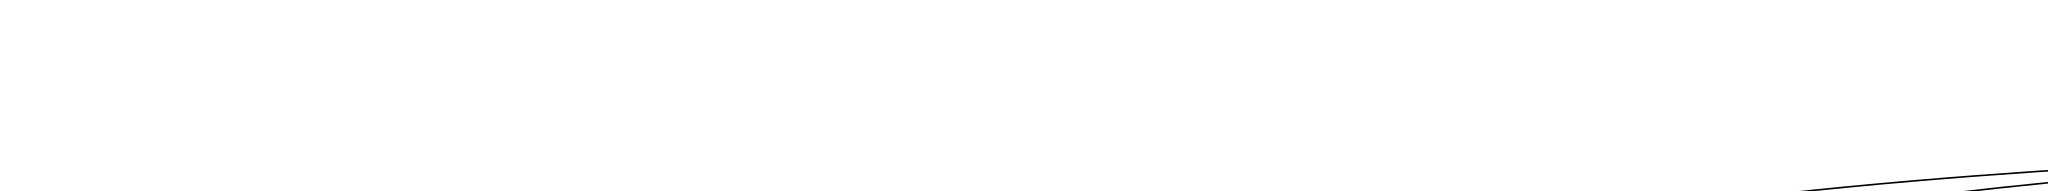

In [ ]:
from random import randint
def dibujarClasesEquivalencia(d,numeroItems,minsupp):
    a = fpgrowth(d, target='a', supp=minsupp)
    c = fpgrowth(d, target='c', supp=minsupp)
    dot = Graph(comment='Lattice')
    dot.attr(size='40,20')
    pa,fa = tratarPatterns(a)
    pc,fc = tratarPatterns(c)
    clases = {}
    for i in range(pow(2,numeroItems)):
        b = to_binary(i, numeroItems)
        b1 = [(j+1) for j in range(len(b)) if b[j] == '1']
        clases[str(b1)] = 1
        if str(b1) in pa or i == 0:
            if str(b1) in pc:#closed
                dot.node(b, str(b1).replace("'","").replace(" ","") + " " + str(fc[pc.index(str(b1))]), shape='Square', style='filled', color='orange')
            else:
                if len(b1) == 0:
                  dot.node(b, str(b1).replace("'","").replace(" ",""), style='filled')
                else:
                  dot.node(b, str(b1).replace("'","").replace(" ","") + " " + str(fa[pa.index(str(b1))]), shape='Square', style='filled', fillcolor='white')
        else:
            dot.node(b, str(b1).replace("'","").replace(" ",""), shape='Square', style='filled', color='lightgray', fontcolor = 'white')
        for j in range(numeroItems):
            if b[j] == '1':
                b1 = b[:j] + "0" + b[j + 1:]
                dot.edge(b, b1)
                b2 = [(j+1) for j in range(len(b)) if b1[j] == '1']
                b3 = [(j+1) for j in range(len(b)) if b[j] == '1']
                if len(b2) > 0:

                  if fa[pa.index(str(b2))] == fa[pa.index(str(b3))]:
                    clases[str(b2)] = clases[str(b3)]
                  else:
                    clases[str(b2)] = randint(clases[str(b3)]+1, 20)
                  print(b3,b2,fa[pa.index(str(b2))], fa[pa.index(str(b3))],clases[str(b3)],clases[str(b2)])
    print(clases)
    return dot
dibujarClasesEquivalencia(trans2, 8, -1)